In [3]:
import numpy as np
import matplotlib.pyplot as plt

print("Imports OK")


Imports OK


In [4]:
X = np.load("../data/msff_features.npy")
y = np.load("../data/flood_labels.npy")

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (2004, 2225, 18)
Labels shape: (2004, 2225)


In [5]:
X_flat = X.reshape(-1, X.shape[-1])
y_flat = y.reshape(-1)

print("Flattened X:", X_flat.shape)
print("Flattened y:", y_flat.shape)


Flattened X: (4458900, 18)
Flattened y: (4458900,)


In [6]:
mask = ~np.isnan(y_flat)

X_flat = X_flat[mask]
y_flat = y_flat[mask]

print("Valid samples:", X_flat.shape)


Valid samples: (4458900, 18)


In [7]:
X_flood = X_flat[y_flat == 1]
X_nonflood = X_flat[y_flat == 0]

print("Flood samples:", X_flood.shape)
print("Non-flood samples:", X_nonflood.shape)


Flood samples: (1294524, 18)
Non-flood samples: (3164376, 18)


In [8]:
mean_flood = X_flood.mean(axis=0)
mean_nonflood = X_nonflood.mean(axis=0)

print("Model training completed")


Model training completed


In [9]:
dist_flood = np.linalg.norm(X_flat - mean_flood, axis=1)
dist_nonflood = np.linalg.norm(X_flat - mean_nonflood, axis=1)

y_pred = (dist_flood < dist_nonflood).astype(np.uint8)

print("Prediction completed")


Prediction completed


In [10]:
accuracy = (y_pred == y_flat).mean()
print("Overall accuracy:", accuracy)


Overall accuracy: 0.707184731660275


In [9]:
flood_map = np.zeros_like(y_flat)
flood_map[mask] = y_pred

flood_map = flood_map.reshape(y.shape)


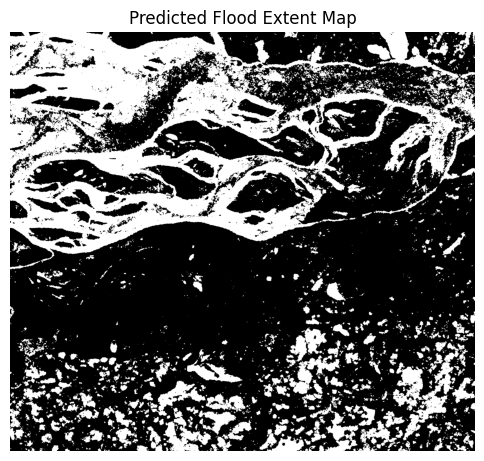

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(flood_map, cmap="gray")
plt.title("Predicted Flood Extent Map")
plt.axis("off")
plt.show()


In [11]:
np.save("../data/predicted_flood_map.npy", flood_map)
print("Predicted flood map saved")


Predicted flood map saved


In [11]:
import os
import joblib

os.makedirs("../models", exist_ok=True)

joblib.dump(
    {
        "mean_flood": mean_flood,
        "mean_nonflood": mean_nonflood
    },
    "../models/flood_distance_model.pkl"
)

print("Distance-based model parameters saved")


Distance-based model parameters saved


In [12]:
import os
print(os.listdir("../models"))


['flood_distance_model.pkl']
